# Advanced pandas

# 12.1 Categorical Data

# Background and Motivation

    Çoğunlukla, tablodaki bir sütun, daha küçük farklı değerler kümesinin yinelenen örneklerini içerebilir. Sırasıyla bir diziden farklı değerleri çıkarmamızı ve frekanslarını hesaplamamızı sağlayan unique ve value_counts gibi fonksiyonları daha önce görmüştük.

In [1]:
import numpy as np; import pandas as pd

In [2]:
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)

In [3]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [4]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [5]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

    Birçok veri sistemi (veri ambarlama, istatistiksel hesaplama veya diğer kullanımlar için), verileri daha verimli depolama ve hesaplama için tekrarlanan değerlerle temsil etmek için özel yaklaşımlar geliştirmiştir. Veri ambarlamada en iyi uygulama, farklı değerleri içeren ve birincil gözlemleri boyut tablosuna referans veren tamsayı anahtarları olarak depolayan boyut tabloları kullanmaktır.

In [6]:
values = pd.Series([0, 1, 0, 0] * 2)

In [7]:
dim = pd.Series(['apple', 'orange'])

In [8]:
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [9]:
dim

0     apple
1    orange
dtype: object

    Orijinal dizi dizisini geri yüklemek için alma yöntemini kullanabiliriz.

In [10]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

    Tamsayılar olarak bu temsil, kategorik veya sözlük kodlu temsil olarak adlandırılır. Farklı değerler dizisi, verilerin kategorileri, sözlükleri veya düzeyleri olarak adlandırılabilir. Bu kitapta kategorik ve kategoriler terimlerini kullanacağız. Kategorilere atıfta bulunan tam sayı değerlerine kategori kodları veya basitçe kodlar denir.

    Kategorik temsil, analiz yaparken önemli performans iyileştirmeleri sağlayabilir. Kodları değiştirmeden bırakarak kategoriler üzerinde de dönüşümler gerçekleştirebilirsiniz. Nispeten düşük maliyetle yapılabilecek bazı örnek dönüşümler şunlardır:
        
        • Kategorileri yeniden adlandırmak
        • Mevcut kategorilerin sırasını veya konumunu değiştirmeden yeni bir kategori eklemek

# Pandas'ta Kategorik Tür

    Pandas, tamsayı tabanlı kategorik gösterimi veya kodlamayı kullanan verileri tutmak için özel bir Kategorik tipe sahiptir. Daha önceki örnek Seriyi ele alalım:

In [11]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [12]:
N = len(fruits)

In [13]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])

In [14]:
df

,basket_id,fruit,count,weight
0,0,apple,8,2.587693
1,1,orange,14,2.375683
2,2,apple,14,2.173602
3,3,apple,14,3.069743
4,4,apple,3,0.401675
5,5,orange,3,2.791662
6,6,apple,3,3.935522
7,7,apple,5,2.747347


    Burada, df ['meyve'] bir Python dizesi nesneleri dizisidir. Şunları arayarak onu kategoriye dönüştürebiliriz.

In [15]:
fruit_cat = df['fruit'].astype('category')

In [16]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

    Fruit_cat için değerler bir NumPy dizisi değil, bir pandas örneğidir.

In [17]:
c = fruit_cat.values

In [18]:
type(c)

pandas.core.arrays.categorical.Categorical

    Kategorik nesnenin kategorileri ve kod öznitelikleri vardır.

In [19]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [20]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

    Dönüştürülen sonucu atayarak DataFrame sütununu kategorik hale dönüştürebilirsiniz.

In [21]:
df['fruit'] = df['fruit'].astype('category')

In [22]:
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

    Ayrıca doğrudan diğer Python dizileri türlerinden de pandalar.Categorical oluşturabilirsiniz.

In [23]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])

In [24]:
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

    Başka bir kaynaktan kategorik kodlanmış veriler elde ettiyseniz, from_codes yapıcısından alternatifi kullanabilirsiniz.

In [25]:
categories = ['foo', 'bar', 'baz']

In [26]:
codes=[0,1,2,0,0,1]

In [28]:
my_cats_2 = pd.Categorical.from_codes(codes, categories)

In [29]:
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

    Açıkça belirtilmedikçe, kategorik dönüştürmeler, kategorilerin belirli bir sıralamasının olmadığını varsayar. Dolayısıyla, kategori dizisi, giriş verilerinin sırasına bağlı olarak farklı bir sırada olabilir. From_codes veya diğer kuruculardan herhangi birini kullanırken, kategorilerin anlamlı bir sıralamaya sahip olduğunu belirtebilirsiniz.

In [30]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                        ordered=True)

In [31]:
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

    [Foo <bar <baz] çıktısı, sıralamada 'foo'nun' bar'dan önce geldiğini belirtir ve bu böyle devam eder. Sırasız kategorik bir örnek, as_ordered ile sıralanabilir.

In [32]:
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

    Son bir not olarak, yalnızca dizgi örnekleri göstermeme rağmen kategorik verilerin dizge olması gerekmez. Kategorik bir dizi, herhangi bir değişmez değer türünden oluşabilir.

# Kategoriye göre hesaplamalar
    Pandas Categorical'i kodlanmamış sürümle karşılaştırıldığında (bir dizi dizesi gibi) kullanmak genellikle aynı şekilde davranır. Pandaların groupby işlevi gibi bazı bölümleri, kategoriklerle çalışırken daha iyi performans gösterir. Sıralı bayrağı kullanabilen bazı işlevler de vardır. Bazı rastgele sayısal verileri ele alalım ve pandas.qcut binning fonksiyonunu kullanalım. Bu dönüş pandas'ı kategorik.

In [33]:
np.random.seed(12345)

In [35]:
draws = np.random.randn(1000)

In [36]:
draws[:5]

array([-0.98350472,  0.93094376, -0.81167564, -1.83015626, -0.13873015])

    Bu verilerin dörtte bir gruplamasını hesaplayalım ve bazı istatistikleri çıkaralım.

In [37]:
bins = pd.qcut(draws, 4)

In [38]:
bins

[(-3.746, -0.623], (0.677, 3.26], (-3.746, -0.623], (-3.746, -0.623], (-0.623, -0.0206], ..., (-3.746, -0.623], (-0.623, -0.0206], (-0.623, -0.0206], (-3.746, -0.623], (0.677, 3.26]]
Length: 1000
Categories (4, interval[float64]): [(-3.746, -0.623] < (-0.623, -0.0206] < (-0.0206, 0.677] < (0.677, 3.26]]

    Yararlı olsa da, tam örnek çeyrekleri bir rapor oluşturmak için çeyrek adlarından daha az yararlı olabilir. Bunu qcut'ın etiketler argümanıyla başarabiliriz.

In [39]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [40]:
bins

['Q1', 'Q4', 'Q1', 'Q1', 'Q2', ..., 'Q1', 'Q2', 'Q2', 'Q1', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [41]:
bins.codes[:10]

array([0, 3, 0, 0, 1, 2, 2, 1, 3, 2], dtype=int8)

    Kategorik etiketli bölmeler, verilerdeki bölme kenarları hakkında bilgi içermez, bu nedenle bazı özet istatistikleri çıkarmak için groupby'yi kullanabiliriz.

In [42]:
bins = pd.Series(bins, name='quartile')

In [43]:
results = (pd.Series(draws)
           .groupby(bins)
           .agg(['count', 'min', 'max'])
           .reset_index())

In [44]:
results

,quartile,count,min,max
0,Q1,250,-3.745356,-0.627426
1,Q2,250,-0.621249,-0.021299
2,Q3,250,-0.019941,0.677246
3,Q4,250,0.677263,3.260383


    Sonuçtaki 'çeyrek' sütunu, kutulardaki sıralama dahil olmak üzere orijinal kategorik bilgileri saklar.

In [45]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

# Kategoriklerle daha iyi performans
    Belirli bir veri kümesi üzerinde çok fazla analiz yaparsanız, kategoriye dönüştürmek önemli genel performans kazanımları sağlayabilir. Bir DataFrame sütununun kategorik bir sürümü de genellikle önemli ölçüde daha az bellek kullanır. 10 milyon unsur ve az sayıda farklı kategori içeren bazı Serileri ele alalım:

In [46]:
N = 10000000

In [47]:
draws = pd.Series(np.random.randn(N))

In [48]:
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

    Şimdi etiketleri kategorik hale getiriyoruz:

In [49]:
categories = labels.astype('category')

    Şimdi etiketlerin kategorilerden önemli ölçüde daha fazla bellek kullandığını not ediyoruz:

In [50]:
labels.memory_usage()

80000128

In [51]:
categories.memory_usage()

10000320

    Kategoriye dönüştürme elbette ücretsiz değildir, ancak tek seferlik bir maliyettir.

In [52]:
%time _ = labels.astype('category')

CPU times: user 381 ms, sys: 25.1 ms, total: 406 ms
Wall time: 407 ms


    GroupBy işlemleri kategoriklerle önemli ölçüde daha hızlı olabilir, çünkü temel algoritmalar bir dizi dizisi yerine tamsayı tabanlı kod dizisini kullanır.

# Kategorik Yöntemler
    Kategorik veriler içeren diziler, Ser ies.str özel dizge yöntemlerine benzer birkaç özel yönteme sahiptir. Bu aynı zamanda kategori ve kodlara kolay erişim sağlar. Seriyi düşünün:

In [53]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)

In [54]:
cat_s = s.astype('category')

In [55]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

    Cat özel niteliği, kategorik yöntemlere erişim sağlar.

In [56]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [57]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

    Bu veriler için gerçek kategori kümesinin verilerde gözlemlenen dört değerin ötesine geçtiğini bildiğimizi varsayalım. Bunları değiştirmek için set_categories yöntemini kullanabiliriz.

In [58]:
actual_categories = ['a', 'b', 'c', 'd', 'e']

In [59]:
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [60]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

    Veriler değişmemiş gibi görünse de, yeni kategoriler onları kullanan işlemlere yansıtılacaktır. Örneğin, değer_sayısı, varsa kategorilere saygı duyar.

In [61]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [62]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

    Büyük veri kümelerinde, kategorik bilgiler genellikle bellek tasarrufu ve daha iyi performans için uygun bir araç olarak kullanılır. Büyük bir DataFrame veya Seriyi filtreledikten sonra, kategorilerin çoğu verilerde görünmeyebilir. Buna yardımcı olmak için, gözlenmeyen kategorileri kırpmak için remove_unused_categories yöntemini kullanabiliriz.

In [63]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [64]:
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [65]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

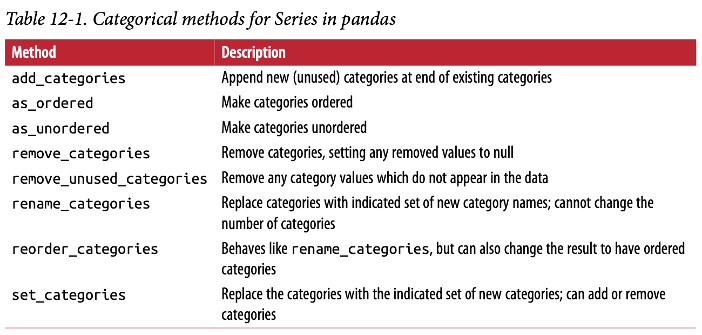

In [66]:
from IPython.display import Image
Image("img/picture84.png")

# Modelleme için kukla değişkenler oluşturma
    İstatistikleri veya makine öğrenimi araçlarını kullanırken, genellikle kategorik verileri, tek etkin kodlama olarak da bilinen kukla değişkenlere dönüştürürsünüz. Bu, her farklı kategori için bir sütun içeren bir DataFrame oluşturmayı içerir; bu sütunlar, belirli bir kategorinin oluşumları için 1'leri ve aksi takdirde 0'ı içerir.

    Önceki örneği ele alalım:

In [67]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

    Bölüm 7'de daha önce bahsedildiği gibi, pandas.get_dummies işlevi bu tek boyutlu kategorik verileri kukla değişkeni içeren bir DataFrame'e dönüştürür.

In [68]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# 12.2 Gelişmiş GrupBy Kullanımı
    Bölüm 10'da Series ve DataFrame için groupby yöntemini derinlemesine ele almış olsak da, kullanabileceğiniz bazı ek teknikler vardır.

# Grup Dönüşümleri ve "Sarılmamış" GroupBys
    Bölüm 10'da, dönüşümleri gerçekleştirmek için gruplanmış işlemlerde uygulama yöntemine baktık. Dönüşüm adında, uygulamaya benzer ancak kullanabileceğiniz işlev türüne daha fazla kısıtlama getiren başka bir yerleşik yöntem vardır:
    • Grubun şekline yayınlanacak skaler bir değer üretebilir
    • Giriş grubu ile aynı şekle sahip bir nesne üretebilir
    • Girdisini değiştirmemelidir

    Örnek olarak basit bir örnek ele alalım:

In [69]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})

In [70]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [72]:
g = df.groupby('key').value

In [73]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

    Bunun yerine, df ['value'] ile aynı şekle sahip, ancak 'anahtar' ile gruplanmış ortalama değerlerle değiştirilen bir Seri üretmek istediğimizi varsayalım. Lambda x: x.mean () fonksiyonunu dönüşüme geçirebiliriz.

In [75]:
g.transform(lambda x: x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

    Yerleşik toplama işlevleri için, GroupBy agg yönteminde olduğu gibi bir dize takma adı iletebiliriz.

In [76]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

    Apply gibi, transform da Series döndüren işlevlerle çalışır, ancak sonuç girdiyle aynı boyutta olmalıdır. Örneğin, bir lambda işlevi kullanarak her grubu 2 ile çarpabiliriz.

In [77]:
g.transform(lambda x: x * 2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

    Daha karmaşık bir örnek olarak, sıralamaları her grup için azalan sırada hesaplayabiliriz.

In [79]:
g.transform(lambda x: x.rank(ascending=False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

    Basit toplamalardan oluşan bir grup dönüştürme işlevi düşünün:

In [80]:
def normalize(x):
    return (x - x.mean()) / x.std()

    Bu durumda, dönüşüm kullanarak veya uygulayarak eşdeğer sonuçlar elde edebiliriz:

In [81]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [82]:
g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

    "Ortalama" veya "toplam" gibi yerleşik toplama işlevleri genellikle genel uygulama işlevinden çok daha hızlıdır. Dönüşümle birlikte kullanıldığında bunların da "hızlı geçmişi" vardır. Bu, paketlenmemiş grup işlemi yapmamıza izin verir.

In [83]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [85]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')

In [86]:
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

    Sarılmamış bir grup işlemi birden fazla grup toplamasını içerebilirken, vektörleştirilmiş işlemlerin genel faydası genellikle bundan daha ağır basar.

# Gruplanmış Zaman Resampling
    Zaman serisi verileri için, yeniden örnekleme yöntemi anlamsal olarak bir zaman aralığına dayalı bir grup işlemidir. İşte küçük bir örnek tablo:

In [88]:
N=15

In [89]:
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)

In [90]:
df = pd.DataFrame({'time': times,
                   'value': np.arange(N)})

In [91]:
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


    Burada, 'zaman'a göre indeksleyebilir ve sonra yeniden örnekleyebiliriz.

In [92]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


    Bir DataFrame'in, ek bir grup anahtarı sütunu ile işaretlenmiş birden çok zaman serisi içerdiğini varsayalım:

In [93]:
df2 = pd.DataFrame({'time': times.repeat(3),
                    'key': np.tile(['a', 'b', 'c'], N),
                    'value': np.arange(N * 3.)})

In [94]:
df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


    Her bir "anahtar" değeri için aynı yeniden örneklemeyi yapmak için, pandas tanıtıyoruz. Zaman Gruplayıcı nesnesi:

time_key = pd.TimeGrouper('5min')
    
    Daha sonra zaman indeksini ayarlayabilir, 'anahtar' ve zaman_anahtarına göre gruplayabilir ve bir araya getirebiliriz.
    
    resampled = (df2.set_index('time')
                     .groupby(['key', time_key])
                     .sum())
    resampled
    resampled.reset_index()
    
      TimeGrouper kullanımıyla ilgili bir kısıtlama, zamanın Serilerin veya DataFrame'in indeksi olması gerektiğidir.

# 12.3 Yöntem Zincirleme Teknikleri
    Bir veri kümesine bir dizi dönüşüm uygularken, kendinizi analizinizde asla kullanılmayan çok sayıda geçici değişken yaratırken bulabilirsiniz. Örneğin şu örneği ele alalım:

df = load_data()
df2 = df[df['col2'] < 0]
df2['col1_demeaned'] = df2['col1'] - df2['col1'].mean()
result = df2.groupby('key').col1_demeaned.std()

    Burada herhangi bir gerçek veri kullanmasak da, bu örnek bazı yeni yöntemleri vurgulamaktadır. İlk olarak, DataFrame.assign yöntemi, df [k] = v biçimindeki sütun atamalarına işlevsel bir alternatiftir. Nesneyi yerinde değiştirmek yerine, belirtilen değişiklikleri içeren yeni bir DataFrame döndürür. Yani bu ifadeler eşdeğerdir.
    
        # Usual non-functional way
    df2 = df.copy()
    df2['k'] = v
    # Functional assign way
    df2 = df.assign(k=v)
    
    Yerinde atama, atamayı kullanmaktan daha hızlı yürütülebilir, ancak atama daha kolay yöntem zincirleme sağlar.
    
       result = (df2.assign(col1_demeaned=df2.col1 - df2.col2.mean())
              .groupby('key')
              .col1_demeaned.std())
      
    Yöntem zincirleme yaparken akılda tutulması gereken bir şey, geçici nesnelere başvurmanız gerekebileceğidir. Önceki örnekte, df geçici değişkenine atanana kadar load_data sonucuna başvuramayız. Buna yardımcı olmak için, atama ve diğer pek çok pandanın işlevi çağrılabilirler olarak da bilinen işlev benzeri argümanları kabul eder.
    
    Callable'ları iş başında göstermek için, önceki örneğin bir parçasını düşünün:
    
     df = load_data()
    df2 = df[df['col2'] < 0]
    
    Bu şu şekilde yeniden yazılabilir:
    
    df = (load_data()
        [lambda x: x['col2'] < 0])
        
        
        Burada, yük_verisinin sonucu bir değişkene atanmaz, dolayısıyla [] 'ye iletilen işlev daha sonra yöntem zincirinin o aşamasında nesneye bağlanır.
        
        Ardından devam edebilir ve tüm diziyi tek zincirli bir ifade olarak yazabiliriz:
        
        result = (load_data()
            [lambda x: x.col2 < 0]
            .assign(col1_demeaned=lambda x: x.col1 - x.col1.mean()) .groupby('key')
            .col1_demeaned.std())
      
       Bu tarzda kod yazmayı tercih edip etmemeniz bir zevk meselesidir ve ifadeyi birden çok adıma bölmek kodunuzu daha okunaklı hale getirebilir.

# Boru Yöntemi
    Yerleşik pandas işlevleriyle ve az önce incelediğimiz çağrılabilir yöntemlerle yöntem zincirleme yaklaşımlarıyla çok şey başarabilirsiniz. Ancak, bazen üçüncü taraf kitaplıklarından kendi işlevlerinizi veya işlevlerinizi kullanmanız gerekir. Boru yönteminin devreye girdiği yer burasıdır.

    Bir dizi işlev çağrısını düşünün.
    a = f(df, arg1=v1)
    b = g(a, v2, arg3=v3)
    c = h(b, arg4=v4)
    
    Series veya DataFrame nesnelerini kabul eden ve döndüren işlevleri kullanırken, bunu boru çağrılarını kullanarak yeniden yazabilirsiniz.
    
    result = (df.pipe(f, arg1=v1)
              .pipe(g, v2, arg3=v3)
              .pipe(h, arg4=v4))
              
    F (df) ve df.pipe (f) ifadesi eşdeğerdir, ancak boru zincirleme çağırmayı kolaylaştırır.
    Boru için potansiyel olarak yararlı bir model, işlem dizilerini yeniden kullanılabilir işlevlere genelleştirmektir. Örnek olarak, bir sütundan grup ortalamalarını çıkarmayı düşünelim:
    
    g = df.groupby(['key1', 'key2'])
    df['col1'] = df['col1'] - g.transform('mean')
    
    
    Birden fazla sütunu küçümsemek ve grup anahtarlarını kolayca değiştirmek istediğinizi varsayalım. Ek olarak, bu dönüşümü bir yöntem zincirinde gerçekleştirmek isteyebilirsiniz. İşte örnek bir uygulama:
    
    
    
    def group_demean(df, by, cols): 
    result = df.copy()
    g = df.groupby(by)
    for c in cols:
        result[c] = df[c] - g[c].transform('mean') 
        return result
        
        result = (df[df.col1 < 0]
              .pipe(group_demean, ['key1', 'key2'], ['col1']))